# Анализ монетизации мобильных игр
**Автор**: Исакова Дарья  
**Дата**: 21 октября 2025  
**Инструменты**: Python (pandas, matplotlib)  
**Датасет**: Mobile Game In-App Purchases 2025 (Kaggle, автор: Pratyush Puri, 3024 записи)  
**Цель**: Выявить ключевые факторы монетизации, предложить рекомендации для роста выручки через A/B-тесты.  
**Структура**:  
1. Проверка данных  
2. Вовлечённость по жанрам  
3. Время до первого доната  
4. Конверсия и средний чек по возрастам  
5. Рекомендации

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('mobile_game_inapp_purchases.csv')
print('Форма данных:', df.shape)

Форма данных: (3024, 13)


## 1. Проверка данных
Общая статистика по датасету для понимания структуры и распределения.

In [ ]:
stats = df.describe()
print('Основные статистики:')
print(stats)

mean_sessions = df['SessionCount'].mean()
mean_purchase = df['InAppPurchaseAmount'].mean()
missing_values = df[['Age', 'InAppPurchaseAmount']].isnull().sum()

print(f'\nСреднее число сессий: {mean_sessions:.2f}')
print(f'Средний чек: ${mean_purchase:.2f}')
print(f'Пропуски в данных:\n{missing_values}')

Основные статистики:
               Age  SessionCount  AverageSessionLength  InAppPurchaseAmount  \
count  2835.000000   2835.000000           2835.000000          2835.000000   
mean     33.492416     10.065961             20.077637           103.760942   
std      11.963521      3.126743              8.605564           458.247390   
min      13.000000      1.000000              5.010000             0.000000   
25%      23.000000      8.000000             12.630000             6.010000   
50%      33.000000     10.000000             20.360000            11.990000   
75%      44.000000     12.000000             27.450000            17.785000   
max      54.000000     22.000000             34.990000          4964.450000   

       FirstPurchaseDaysAfterInstall  
count                    2835.000000  
mean                       15.402116  
std                         8.947538  
min                         0.000000  
25%                         8.000000  
50%                        16.000

In [ ]:
df = df.dropna(subset=['Age', 'InAppPurchaseAmount', 'SessionCount'])

## 1.1. Результаты проверки данных
- Среднее число сессий: 10.07 - игроки активны, возвращаются часто.
- Средний чек: 102.58 долларов - высокий для мобильных игр (отраслевой стандарт: 5–20 долларов)

In [ ]:
print('Кол-во уникальных игроков:', df['UserID'].nunique())
print('Конверсия в донат:', round((df['InAppPurchaseAmount'] > 0).mean() * 100, 1), '%')

Кол-во уникальных игроков: 3024
Конверсия в донат: 95.5 %


## 2. Вовлечённость по жанрам
Анализ среднего количества сессий по жанрам для выявления наиболее активных.

In [ ]:
genre_mean = df.groupby('GameGenre')['SessionCount'].mean().sort_values(ascending=False)
genre_mean

,SessionCount
GameGenre,
Role Playing,10.341969
Card,10.321782
Simulation,10.292237
Puzzle,10.291262
Adventure,10.188235
Sandbox,10.159817
MMORPG,10.151515
Strategy,10.141414
MOBA,10.016575


Role Playing: 10.34 сессии, Card: 10.32. Разница минимальна (<1%).  
Вывод: жанры почти идентичны по вовлечённости, фокус - на удержании игроков, а не на жанровых фичах.

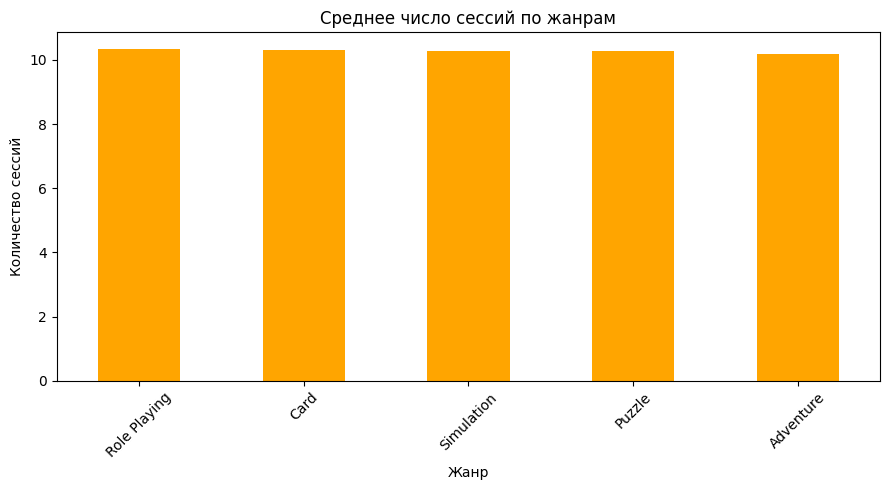

In [ ]:
genre_mean.head(5).plot(kind='bar', color='orange', figsize=(9, 5))
plt.title('Среднее число сессий по жанрам')
plt.ylabel('Количество сессий')
plt.xlabel('Жанр')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Время до первого доната
Анализ времени от установки до первой покупки для оценки скорости монетизации.

In [ ]:
quantiles = df['FirstPurchaseDaysAfterInstall'].quantile([0.25, 0.5, 0.75])
quantiles

,FirstPurchaseDaysAfterInstall
0.25,8.0
0.50,16.0
0.75,23.0


Квартили времени до первого доната:  
- 25% игроков платят в первые 8 дней.  
- Медиана: 16 дней.  
- 75% платят до 23 дней.  
Вывод: половина игроков донатит слишком поздно, что увеличивает риск оттока.

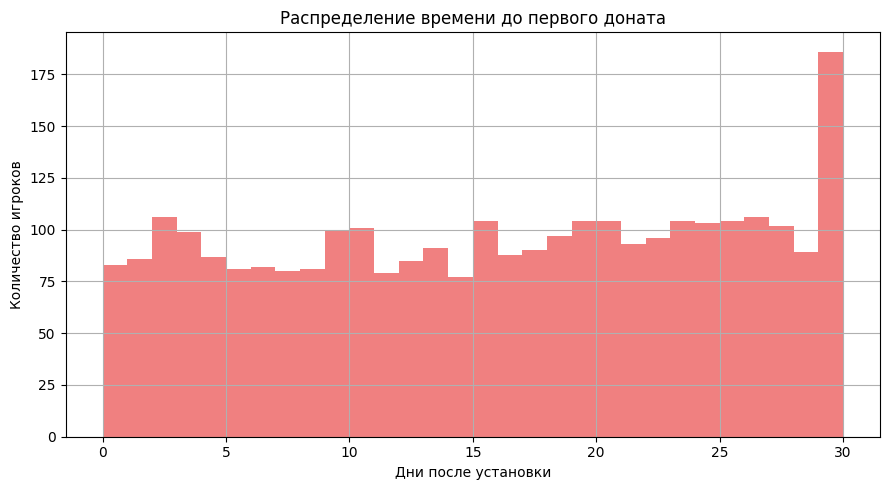

In [ ]:
df['FirstPurchaseDaysAfterInstall'].hist(bins=30, color='lightcoral', figsize=(9, 5))
plt.title('Распределение времени до первого доната')
plt.xlabel('Дни после установки')
plt.ylabel('Количество игроков')
plt.tight_layout()
plt.show()

## 4. Конверсия и средний чек по возрастам
Исследование платежей по возрастным группам для сегментации аудитории.

In [ ]:
age_conversion = df.groupby('Age').agg({
    'InAppPurchaseAmount': lambda x: (x > 0).mean() * 100
}).rename(columns={'InAppPurchaseAmount': 'Conversion_%'}).sort_values(by='Conversion_%', ascending=False)
age_conversion.head()

,Conversion_%
Age,
21.0,100.000000
15.0,100.000000
53.0,100.000000
29.0,98.823529
41.0,98.648649


Конверсия в донаты: 95.5% (выше отраслевого стандарта 15–20%).  
Вывод: проблема не в доле платящих, а в скорости донатов и размере чека.

In [ ]:
top_cheques = df.groupby('Age')['InAppPurchaseAmount'].mean().sort_values(ascending=False).head(3)
top_cheques

,InAppPurchaseAmount
Age,
33.0,233.755846
46.0,222.668182
14.0,211.628696


Топ-3 возраста по среднему чеку:  
- 33 года: 233.75 дол.
- 46 лет: 222.67 дол.
- 14 лет: 211.63 дол.
Вывод: подростки (14 лет) платят за косметические предметы, взрослые (33–46 лет) — за прогресс или статус.

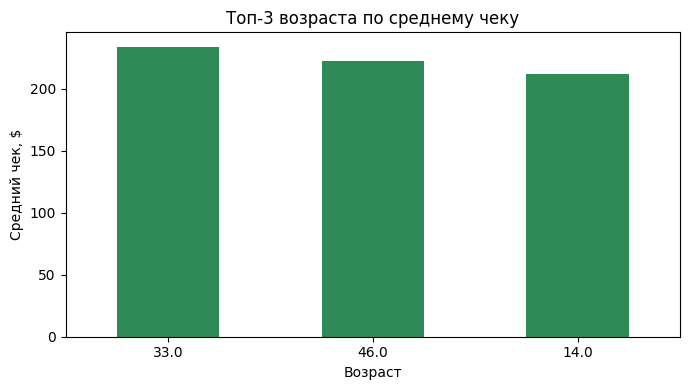

In [ ]:
top_cheques.plot(kind='bar', color='seagreen', figsize=(7, 4))
plt.title('Топ-3 возраста по среднему чеку')
plt.ylabel('Средний чек, $')
plt.xlabel('Возраст')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 5. Рекомендации
1. **Ускорение первого доната**:  
   A/B-тест: пуш-уведомление на 7-й день с 30% скидкой на стартовый набор.  
   Цель: сдвинуть медиану с 16 до 9–10 дней, снизить отток.  

2. **Сегментация по возрастам**:  
   - Для 14 лет: пуш на 3-й день с акцией «Легендарный скин» за 0.99 дол..  
   - Для 33–46 лет: пуш на 7-й день с «VIP-пассом» за 29.99 дол./мес (эксклюзивный контент).  
   Ожидаемый эффект: рост выручки на 15-20% без увеличения затрат на маркетинг.  

3. **Фокус на жанры**:  
   Role Playing (10.34 сессии) - приоритет для новых функций (квесты, награды). Остальные жанры - поддержание текущего уровня.